In [3]:
import matplotlib.pyplot as plt
import sys
import cartopy.crs as ccrs

sys.path.append('../FSLE')
from FSLE_functions import *

In [4]:
# Set parameters for FSLE computation.
temp_dir = '_tmp/'
time = pd.Timestamp('2023-06-15')
domain = [140,160,-60,-50]
integration_time = 7  # days around the reference time, here +/-3 days 
resolution = 0.02
final_separation = 0.1

In [5]:
# First case: BRAN dataset
input_file = '../data/BRAN2020_uv_2023_06.nc'
ds = xr.open_dataset(input_file).isel(depth=-1)

BRAN = ds.assign(longitude=ds.x[0], latitude=ds.y[:, 0])
variables = {'time': 'time', 'longitude': 'longitude', 'latitude': 'latitude', 'u': 'u', 'v': 'v'}

# Compute FSLE for BRAN and save the results to the output file.
output_file = 'FSLE_BRAN.nc'
compute_FSLE(BRAN, variables, time, domain, resolution, final_separation, integration_time, output_file, temp_dir)


map_of_fle _tmp/list.ini FSLE_BRAN.nc         20230618 --advection_time 6 --resolution 0.02         --x_min 140.0 --x_max 160.0 --y_min -60.0 --y_max -50.0         --final_separation 0.1 --time_direction backward


In [6]:
# Second case: DUACS dataset
input_file = '../data/nrt_merged_alti_sot_accmeander_2023_06.nc'
DUACS = xr.open_dataset(input_file)
variables = {'time': 'time', 'longitude': 'longitude', 'latitude': 'latitude', 'u': 'ugos', 'v': 'vgos'}

# Compute FSLE for DUACS and save the results to a different output file.
output_file = 'FSLE_DUACS.nc'
compute_FSLE(DUACS, variables, time, domain, resolution, final_separation, integration_time, output_file, temp_dir)

map_of_fle _tmp/list.ini FSLE_DUACS.nc         20230619 --advection_time 7 --resolution 0.02         --x_min 140.125 --x_max 159.875 --y_min -59.875 --y_max -50.125         --final_separation 0.1 --time_direction backward


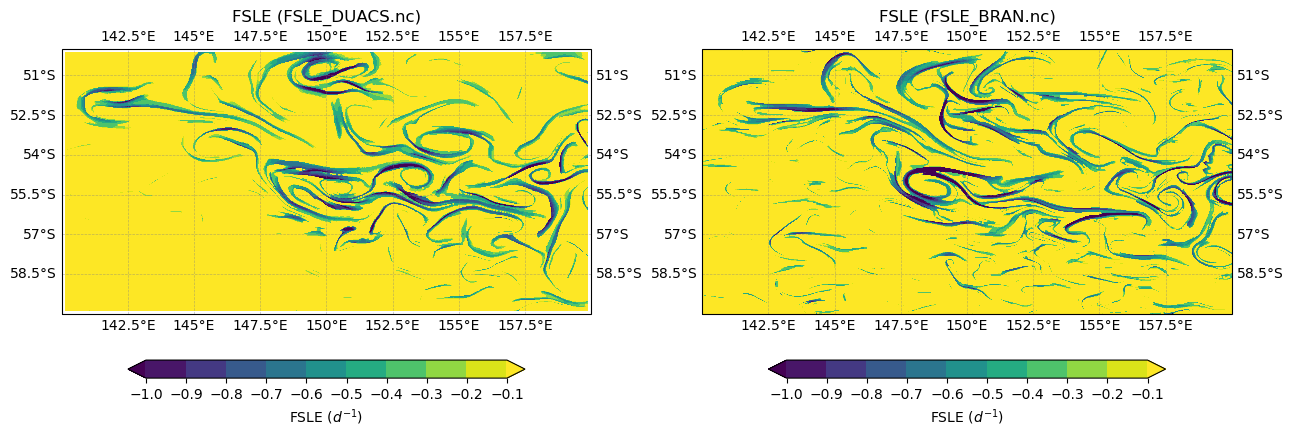

In [7]:
plt.figure(figsize=(12, 5))

for i, fsle_file in enumerate(['FSLE_DUACS.nc', 'FSLE_BRAN.nc']):
    FSLE = xr.open_dataset(fsle_file)

    ax = plt.subplot(1, 2, i + 1, projection=ccrs.PlateCarree())
    ax.set_extent(domain)

    im = ax.contourf(FSLE.lon, FSLE.lat, FSLE.lambda1.T, levels=np.arange(-1,0,0.1), cmap='viridis', extend='both')
    plt.colorbar(im, label=r'FSLE ($d^{-1}$)', orientation = 'horizontal', shrink = 0.75, pad = 0.1)

    ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', alpha=0.5, linestyle='--')
    plt.title(f'FSLE ({FSLE.attrs["output"]})')

    del FSLE

plt.tight_layout(w_pad = 8)
plt.show()
